In [57]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [9]:
dta = sm.datasets.fair.load_pandas().data

# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

In [10]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


Text(0, 0.5, 'Frequency')

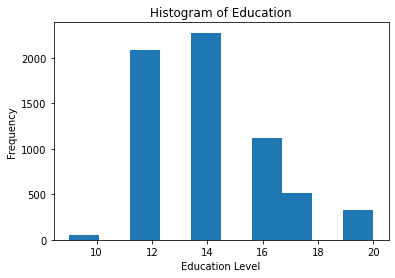

In [12]:
%matplotlib inline

# histogram of education
dta.educ.hist(grid=False)
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

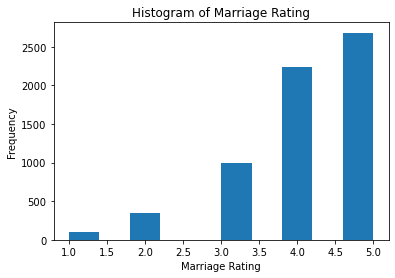

In [13]:
dta.rate_marriage.hist(grid=False)
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

In [14]:
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=897)

In [23]:
y=dta.iloc[:,9:]

In [29]:
x=dta.iloc[:,0:9]

In [59]:
lg= LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [51]:
pred= lg.predict(X_test)

In [53]:
print (metrics.accuracy_score(y_test, pred))

0.9780104712041885


In [58]:
scores = cross_val_score(LogisticRegression(), x, y, scoring='accuracy', cv=10)
print (scores)

[0.98273155 0.97802198 0.9733124  0.97174254 0.98430141 0.97174254
 0.97327044 0.9827044  0.98113208 0.97955975]
